In [31]:
from pathlib import Path
# dir = Path("/home/holywater2/cond_crystal/MOFFlow_gen")

import os
import sys
# os.chdir(dir)
# sys.path.append(str(dir))

from hydra.experimental import compose
from hydra import initialize_config_dir

In [32]:
import torch
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.io import read, write
from pymatgen.core import Structure, Lattice
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.structure_matcher import StructureMatcher

import pandas as pd
from pymatgen.io.cif import CifParser
from pyxtal import pyxtal
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import os
from pathlib import Path
import zipfile

# Constants
RADII = 0.5
ROTATION = '30x,30y,0z'
# ROTATION = '0x,0y,0z'
matcher = StructureMatcher(primitive_cell=False)
bridge = AseAtomsAdaptor()

# # from rdkit.Chem import PeriodicTable as PT
# from rdkit import Chem

# PT = Chem.GetPeriodicTable()

In [33]:
results_path = "/home/holywater2/crystal_gen/mattergen/results/"
results_path += "spg123_gs0.01_ge0.2_v4"

In [34]:
cif_path = results_path + "/generated_crystals_cif"
structures = []
# get list of cifs from directory
cif_list = [f for f in os.listdir(cif_path) if f.endswith('.cif')]
cif_list.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
cif_list = [os.path.join(cif_path, f) for f in cif_list]

for cif_file in cif_list:
    parser = CifParser(cif_file)
    structure = parser.get_structures(primitive=False)[0]
    structures.append(structure)

/tmp/ipykernel_3646105/2592410626.py:10: FutureWarning: get_structures is deprecated; use parse_structures in pymatgen.io.cif instead.
The only difference is that primitive defaults to False in the new parse_structures method.So parse_structures(primitive=True) is equivalent to the old behavior of get_structures().
  structure = parser.get_structures(primitive=False)[0]


In [35]:
def plot(structure):
    atoms = bridge.get_atoms(structure)
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    plot_atoms(atoms, ax, radii=RADII, rotation=ROTATION)
    sgn = SpacegroupAnalyzer(structure,symprec=0.1)
    print(sgn.get_space_group_number())
    print(sgn.get_crystal_system())
    return sgn

119
tetragonal


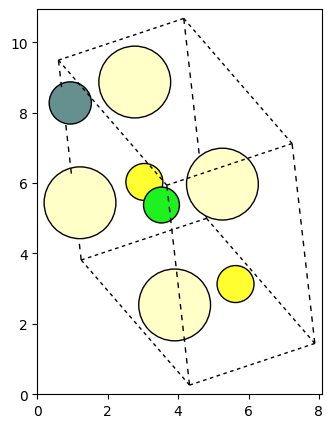

In [39]:
plot(structures[1])